# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [15]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [16]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [17]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 total observations/rows in the data set. GRE has 2 null values, GPA has 2 null values, and Prestige has 1 null value. Admit is the only column that has values for all rows. 

#### Question 2. Create a summary table

In [18]:
#function 
df_raw.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


The summary table tells us a few things:
1. Even though we've already seen the data set, we can assume Admit is a binary field: the min is 0 and the max is 1, and the 25% and 50% quartiles are 0. 
2. GRE, GPA and Prestige contain null values 
3. GRE has a large standard deviation. The range of values is also extremely large: 220 - 800. There may be outliers in the data set. We'd need a density plot to further determine the shape of the distribution.  

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of values for GRE is larger.  The STD for GPA is small relative to GRE, but it may not be small reltaive to the other GPA values. Based on the kurtosis for both fields, we can see that they have similar distrbutions. 

In [43]:
print df_raw.gpa.kurtosis()
print df_raw.gre.kurtosis()
print df_raw.gpa.skew()
print df_raw.gre.skew()

-0.574622543215
-0.330065338167
-0.211765490335
-0.150126665946


#### Question 4. Drop data points with missing data


In [25]:
dfClean = df_raw.dropna() #dropped the null values

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [65]:
dfClean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [26]:
dfClean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

## Answer:

All columns contain the same number of values and no columns contain null values, according to the results of .count and .describe.

If a significant amount of rows would have been removed by dropping the nulls, I would have assumed there was a specific column that had too many nulls. And I would've considered dropping the column instead.

#### Question 6. Create box plots for GRE and GPA

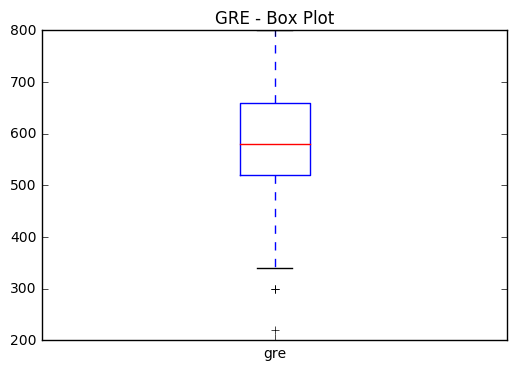

In [38]:
#boxplot 1
dfClean.gre.plot(kind="box", title = 'GRE - Box Plot') 
            

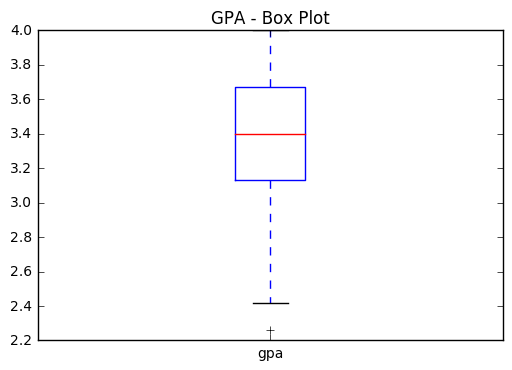

In [39]:
#boxplot 2 #boxplot 1
dfClean.gpa.plot(kind="box", title = 'GPA - Box Plot') 
             

#### Question 7. What do this plots show?

## Answer:
1. We can see the GRE has two outliers and it is very close to a normal distrbution.
2. GPA is slightly skewed . 
3. GPA also has one outlier. 

#### Question 8. Describe each distribution 

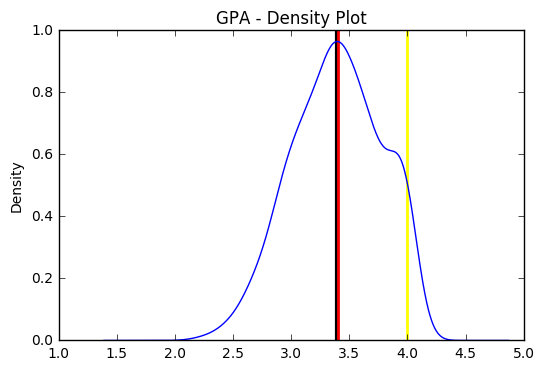

In [46]:
# plot the distribution of each variable 

dfClean.gpa.plot(kind="density", title = 'GPA - Density Plot') 


plt.vlines(dfClean.gpa.mean(),     # Plot black line at mean
           ymin=0,
           ymax=1,
           linewidth=3.0)

plt.vlines(dfClean.gpa.median(),   # Plot red line at median
           ymin=0, 
           ymax=1, 
           linewidth=2.0,
           color="red")

plt.vlines(dfClean.gpa.mode(),   # Plot yellow line at mode
           ymin=0, 
           ymax=1, 
           linewidth=2.0,
           color="yellow")



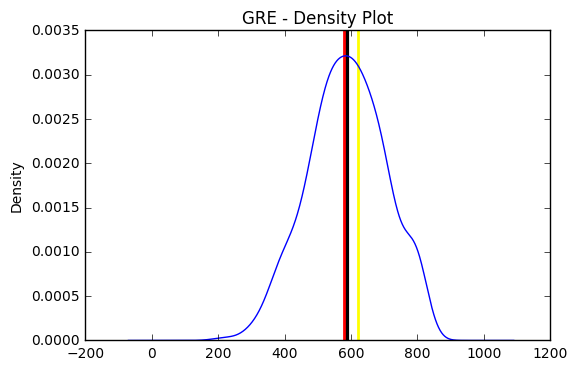

In [53]:
dfClean.gre.plot(kind="density", title = 'GRE - Density Plot') 

plt.vlines(dfClean.gre.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.0035,
           linewidth=3.0)

plt.vlines(dfClean.gre.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red")

plt.vlines(dfClean.gre.mode(),   # Plot yellow line at mode
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="yellow")

In [64]:
print df_raw.gpa.kurtosis()
print df_raw.gre.kurtosis()
print df_raw.gpa.skew()
print df_raw.gre.skew()

-0.574622543215
-0.330065338167
-0.211765490335
-0.150126665946


## Answer: 

Both GRE and GPA are very close to a normal distribution. Even though the mean and median are the same, the modes are different. 

A normal distribtuion has zero kurtosis and zero skewness. 

Both variabes have slightly negative excessive kurtosis, which means the the distribution is slightly flatter than a normal disribution, reducing the probability of very high or low values. 

Both variables also have slightly negative skewness, which means the distributions are skewed to the right, favoring lowering values. The mode confirmrs this point as well. Accrording to this rule of thumb, if skewness is between -0.5 and 0.5, both distributions can be considered approximately symmetric.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

## Answer:  

Mean, Mode and Median are all the same. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

## Answer:

Yes. Both distribtions are skewed to the right and have excessive kurtosis. We should consider removing the outliers, which would shift both skewness and kurtsis closer to normal. 


#### Question 11. Which of our variables are potentially colinear? 

In [5]:
# create a correlation matrix for the data
df_raw.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


## Answer: 

GPA and GRE are potentially colinear. The correlation is .38. Values closer to 1 and -1 indicate colinearity. The value of .38 is suspicious, but not enough to consider these two predicitors as colinear. 

#### Question 12. What did you find?

## Answer: 

Based on the correlation matrix we see the following: 

There is positive correltion between GRE/Admit and GPA/Admit. There is a negative correlation between prestige and all of the other varibles. This makes sense, as the scale for prestige is flipped - 1 is high and 4 is slow. So, the lower the prestige value, the higher the GPA, GRE and chances the students will get accepted. All of these observations are not only accurate, but relevant,  if we consider real world  scenarios. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

## Answer:  

We should do the following:
1. Determine the general composition of the data set by doing:
df.head
df.count
df.shape
df.describe

2. If the dataset contains nulls, eliminate the nulls and re-execute the above operations. 
3. Generate box plots, density charts, and scatter plots to assess the distribution. Both box plots and density charts will help us eyeball kurtosis and skewedness. We can also calculate the metrics directly. 
4  Identify outliers by looking at the charts, and using descriptive metrics like the Z-score. 
5. Remove outliers, as necessary, to reduce the volaility of the dataset. 

#### Question 14. What is your hypothesis? 

In [66]:
print pd.crosstab(dfClean.prestige ,dfClean.admit)

admit      0   1
prestige        
1.0       28  33
2.0       95  53
3.0       93  28
4.0       55  12


Answer:

Generally speaking, students with GRE scores and GPAa in the 50% to 75% quartiles and attended schools with 1 and 2 prestige are most likely to get admitted. 

The data tells us that a high GPA or GRE is not necessarily the best indicator. According to our corrleation matrix, the prestige of the school has the strongest impact on acceptance.  GPA and prestige have a neglible correlation. GRE has a stronger correlation to prestige, which makes sense, as test scores are typically a better indicator of success in college. 



## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Insteasd of removing nulls, we can consider filling the values with the mean of the column.

In [72]:
df_raw.isnull().any()

admit       False
gre          True
gpa          True
prestige     True
dtype: bool

In [79]:
df_raw.describe() #shows the metrics before we fill in the values. 

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [75]:
dfFill = df_raw.fillna(df_raw.mean())

In [78]:
dfFill.describe() # by using the mean as a filler, the mean and std are minimially affected

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### 2. Bonus: Log transform the skewed data

In [89]:
#I didn't have time to continue exploring this concept. This code transformas all columns of the dataframe. 
#I still need to write the code to exclude the admit and prestige column. 

import numpy
dfClean.apply(numpy.log)

,admit,gre,gpa,prestige
0,-inf,5.940171,1.283708,1.098612
1,0.000000,6.492240,1.300192,1.098612
2,0.000000,6.684612,1.386294,0.000000
3,0.000000,6.461468,1.160021,1.386294
4,-inf,6.253829,1.075002,1.386294
5,0.000000,6.633318,1.098612,0.693147
6,0.000000,6.327937,1.091923,0.000000
7,-inf,5.991465,1.124930,0.693147
8,0.000000,6.291569,1.220830,1.098612
9,-inf,6.551080,1.366092,0.693147


#### 3. Advanced: Impute missing data